In [1]:
import pandas as pd

num_img_training = 500 # 202599
#root= "/content/drive/My Drive/Colab Notebooks/Exam2/"
df = pd.read_csv("celeba-dataset/list_attr_celeba.csv")
df = df.iloc[:num_img_training,:41]
df = df.replace([-1],0)
df = df[["image_id","Wearing_Lipstick","Wavy_Hair","Attractive","Young"]]
df

,image_id,Wearing_Lipstick,Wavy_Hair,Attractive,Young
0,000001.jpg,1,0,1,1
1,000002.jpg,0,0,0,1
2,000003.jpg,0,1,0,1
3,000004.jpg,1,0,1,1
4,000005.jpg,1,0,1,1
...,...,...,...,...,...
495,000496.jpg,1,0,1,1
496,000497.jpg,1,1,1,1
497,000498.jpg,0,0,0,0
498,000499.jpg,1,0,0,1


In [2]:
from keras_preprocessing.image import ImageDataGenerator

columns = list(df.iloc[:num_img_training,1:41].columns)
train_dir = "G:\\Alpha_Projects\\AI\\Exam\\celeba-dataset\\img_align_celeba"


datagen=ImageDataGenerator(rescale=1./255.,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.5,horizontal_flip=True, fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255.)

train_div = int(num_img_training*0.7)
test_div  = int(num_img_training*0.9)

train_generator=datagen.flow_from_dataframe(
dataframe=df[:train_div],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(178,218))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[train_div:test_div],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(178,218))

test_generator=test_datagen.flow_from_dataframe(
dataframe=df[test_div:],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
color_mode='rgb',
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(178,218))

C:\ProgramData\Miniconda3\envs\JCastillo\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Found 350 validated image filenames.
Found 100 validated image filenames.
Found 50 validated image filenames.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import regularizers, optimizers

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(178,218,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(columns), activation='sigmoid'))
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 218, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 178, 218, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 216, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 176, 216, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 108, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 88, 108, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 88, 108, 64)       1

In [4]:
from keras.callbacks import ModelCheckpoint

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

checkpointer = ModelCheckpoint(filepath="celeba_model1.h5",monitor='val_accuracy',verbose=0, save_best_only=True,mode='max', period=1)

h=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
10/10 [==============================] - 4s 357ms/step - loss: 1.0722 - accuracy: 0.2390 - val_loss: 0.6625 - val_accuracy: 0.2188
Epoch 2/100
10/10 [==============================] - 3s 305ms/step - loss: 0.6807 - accuracy: 0.2390 - val_loss: 0.6504 - val_accuracy: 0.2292
Epoch 3/100
10/10 [==============================] - 3s 310ms/step - loss: 0.6489 - accuracy: 0.2107 - val_loss: 0.6617 - val_accuracy: 0.2188
Epoch 4/100
10/10 [==============================] - 3s 301ms/step - loss: 0.6471 - accuracy: 0.2170 - val_loss: 0.6569 - val_accuracy: 0.2292
Epoch 5/100
10/10 [==============================] - 3s 301ms/step - loss: 0.6384 - accuracy: 0.2013 - val_loss: 0.6604 - val_accuracy: 0.2083
Epoch 6/100
10/10 [==============================] - 3s 298ms/step - loss: 0.6425 - accuracy: 0.2075 - val_loss: 0.6672 - val_accuracy: 0.2188
Epoch 7/100
10/10 [==============================] - 3s 296ms/step

10/10 [==============================] - 3s 298ms/step - loss: 0.5687 - accuracy: 0.2201 - val_loss: 0.5655 - val_accuracy: 0.1979
Epoch 54/100
10/10 [==============================] - 3s 322ms/step - loss: 0.5734 - accuracy: 0.2327 - val_loss: 0.5696 - val_accuracy: 0.2292
Epoch 55/100
10/10 [==============================] - 3s 310ms/step - loss: 0.5725 - accuracy: 0.2075 - val_loss: 0.5691 - val_accuracy: 0.2812
Epoch 56/100
10/10 [==============================] - 3s 321ms/step - loss: 0.5620 - accuracy: 0.2296 - val_loss: 0.5640 - val_accuracy: 0.2292
Epoch 57/100
10/10 [==============================] - 3s 304ms/step - loss: 0.5630 - accuracy: 0.2170 - val_loss: 0.5562 - val_accuracy: 0.2812
Epoch 58/100
10/10 [==============================] - 3s 298ms/step - loss: 0.5714 - accuracy: 0.2013 - val_loss: 0.5579 - val_accuracy: 0.2812
Epoch 59/100
10/10 [==============================] - 3s 311ms/step - loss: 0.5639 - accuracy: 0.2031 - val_loss: 0.5515 - val_accuracy: 0.3333
Epoch

In [5]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred >0.5)

predictions = pred_bool.astype(int)
#columns=["desert", "mountains", "sea", "sunset", "trees"]
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results.csv",index=False)

Instructions for updating:
Please use Model.predict, which supports generators.
50/50 [==============================] - 0s 3ms/step


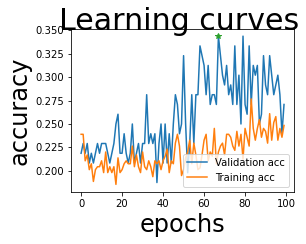

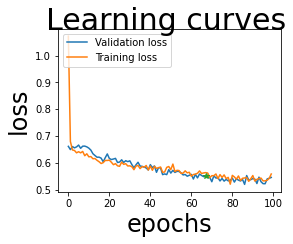

In [6]:
import numpy as np
import matplotlib.pyplot as plt

epoch_max = np.argmax(h.history['val_accuracy'])
plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_accuracy'], label='Validation acc')
plt.plot(h.history['accuracy'], label='Training acc')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['val_accuracy'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_loss'], label='Validation loss')
plt.plot(h.history['loss'], label='Training loss')
plt.legend(loc='upper left')
plt.plot(epoch_max, h.history['val_loss'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('loss',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.show()

In [8]:
df1=pd.DataFrame(results["image_id"])

for column in columns:
    df1[column] = np.where(df.iloc[test_div:,1:41].reset_index(drop=True)[column] == results[column], 1, 0)

In [9]:
df1.sum()

image_id            000451.jpg000452.jpg000453.jpg000454.jpg000455...
Wearing_Lipstick                                                   42
Wavy_Hair                                                          37
Attractive                                                         37
Young                                                              43
dtype: object

In [10]:
df = pd.read_csv("celeba-dataset/list_attr_celeba.csv")
df = df.replace([-1],0)
df.iloc[test_div:num_img_training,1:41].sum()

5_o_Clock_Shadow        4
Arched_Eyebrows        15
Attractive             30
Bags_Under_Eyes         6
Bald                    0
Bangs                  10
Big_Lips               11
Big_Nose                6
Black_Hair              9
Blond_Hair             11
Blurry                  3
Brown_Hair             13
Bushy_Eyebrows          7
Chubby                  1
Double_Chin             0
Eyeglasses              4
Goatee                  2
Gray_Hair               2
Heavy_Makeup           27
High_Cheekbones        26
Male                   17
Mouth_Slightly_Open    33
Mustache                3
Narrow_Eyes             8
No_Beard               42
Oval_Face              19
Pale_Skin               3
Pointy_Nose            14
Receding_Hairline       1
Rosy_Cheeks             7
Sideburns               3
Smiling                25
Straight_Hair           9
Wavy_Hair              18
Wearing_Earrings        9
Wearing_Hat             3
Wearing_Lipstick       29
Wearing_Necklace       10
Wearing_Neck

In [20]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(178,218, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 178, 218, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 178, 218, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 178, 218, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 89, 109, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 89, 109, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 89, 109, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 44, 54, 128)       0     

In [21]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 178, 218, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 178, 218, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 178, 218, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 89, 109, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 89, 109, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 89, 109, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 44, 54, 128)       0     

In [36]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 6, 512)         14714688  
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 3, 512)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 3, 512)         2048      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 12292     
Total params: 14,729,028
Trainable params: 7,092,740
Non-trainable params: 7,636,288
_________________________________________________________________


In [37]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [38]:
#Training and validation stages
h = model.fit(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN, #70
      epochs= 100,
      validation_data=valid_generator,
      validation_steps=STEP_SIZE_VALID,
      workers=0,
      max_queue_size=0)

Epoch 1/100
10/10 [==============================] - 5s 458ms/step - loss: 0.5419 - accuracy: 0.2642 - val_loss: 0.8287 - val_accuracy: 0.3958
Epoch 2/100
10/10 [==============================] - 5s 513ms/step - loss: 0.3810 - accuracy: 0.3994 - val_loss: 0.6254 - val_accuracy: 0.3021
Epoch 3/100
10/10 [==============================] - 5s 477ms/step - loss: 0.2845 - accuracy: 0.4780 - val_loss: 0.4957 - val_accuracy: 0.5208
Epoch 4/100
10/10 [==============================] - 5s 456ms/step - loss: 0.2968 - accuracy: 0.5377 - val_loss: 0.4818 - val_accuracy: 0.5208
Epoch 5/100
10/10 [==============================] - 4s 401ms/step - loss: 0.2699 - accuracy: 0.4560 - val_loss: 0.5635 - val_accuracy: 0.4583
Epoch 6/100
10/10 [==============================] - 4s 403ms/step - loss: 0.2308 - accuracy: 0.4937 - val_loss: 0.4760 - val_accuracy: 0.5521
Epoch 7/100
10/10 [==============================] - 4s 402ms/step - loss: 0.2099 - accuracy: 0.5503 - val_loss: 0.4609 - val_accuracy: 0.4583

Epoch 58/100
10/10 [==============================] - 4s 423ms/step - loss: 0.0567 - accuracy: 0.5157 - val_loss: 0.9103 - val_accuracy: 0.4375
Epoch 59/100
10/10 [==============================] - 4s 398ms/step - loss: 0.0697 - accuracy: 0.4560 - val_loss: 0.8265 - val_accuracy: 0.4167
Epoch 60/100
10/10 [==============================] - 4s 400ms/step - loss: 0.0636 - accuracy: 0.4937 - val_loss: 0.8651 - val_accuracy: 0.3542
Epoch 61/100
10/10 [==============================] - 4s 399ms/step - loss: 0.0890 - accuracy: 0.4371 - val_loss: 1.0196 - val_accuracy: 0.4792
Epoch 62/100
10/10 [==============================] - 4s 428ms/step - loss: 0.0709 - accuracy: 0.4781 - val_loss: 0.9634 - val_accuracy: 0.4479
Epoch 63/100
10/10 [==============================] - 5s 489ms/step - loss: 0.0618 - accuracy: 0.4528 - val_loss: 0.8813 - val_accuracy: 0.4062
Epoch 64/100
10/10 [==============================] - 5s 483ms/step - loss: 0.0597 - accuracy: 0.4906 - val_loss: 0.8135 - val_accuracy:

In [39]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred >0.5)

predictions = pred_bool.astype(int)
#columns=["desert", "mountains", "sea", "sunset", "trees"]
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results2.csv",index=False)

50/50 [==============================] - 0s 7ms/step


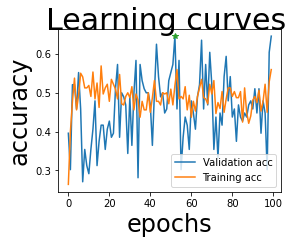

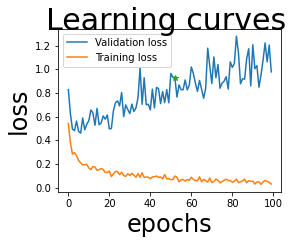

In [40]:
import numpy as np
import matplotlib.pyplot as plt

epoch_max = np.argmax(h.history['val_accuracy'])
plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_accuracy'], label='Validation acc')
plt.plot(h.history['accuracy'], label='Training acc')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['val_accuracy'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_loss'], label='Validation loss')
plt.plot(h.history['loss'], label='Training loss')
plt.legend(loc='upper left')
plt.plot(epoch_max, h.history['val_loss'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('loss',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.show()